# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**

1. Los datos utiles que ayudarian a tasar las propiedades prodian ser: 
      - Ubicacion: la ubicacion es importante a la hora de determinar un precio de la propiedad 
      - Tipos de inmuebles
      - Superficie del inmueble (superfice construida y superfice disponible) 
 
 
 Estos datos son utiles para determinar el precio ya que los mismos son lo que definen el precio de una propiedad. Tanto en cuanto espacio ocupa, en que barrio se ubica y que tipo de inmuebles permiten al consumidor determinar un valor de la propiedad. Por ejemplo, elige una propiedad si esta cerca de su trabajo o si el que consumidor es casado prentende una casa cerca de la escuela para sus hijos. Esta y otras caracterisca son las determinantes de valor para quienes en un futuro adquieran las propiedad. 
        

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib. pyplot as plt 
import seaborn as sns

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [6]:
data=pd.read_csv('DS_proyecto_01_Datos_Properati.csv')

In [7]:
data.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [8]:
data.shape

(146660, 19)

**El dataset tiene 14660 filas y 19 columnas**

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [9]:
#data.isnull()

In [10]:
data.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [11]:
data['property_type'].value_counts() 

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

In [12]:
x=data.groupby(['property_type']).sum()
print('Cantindad de tipos de propiedad', x.shape)



Cantindad de tipos de propiedad (10, 8)


El dataset tiene 10 tipos de propiedades, entre ellas son: Departamento, Casa, PH, Lore, Oficina, Local comercial, Casa de Campo, Deposito, Cochera y otros.  

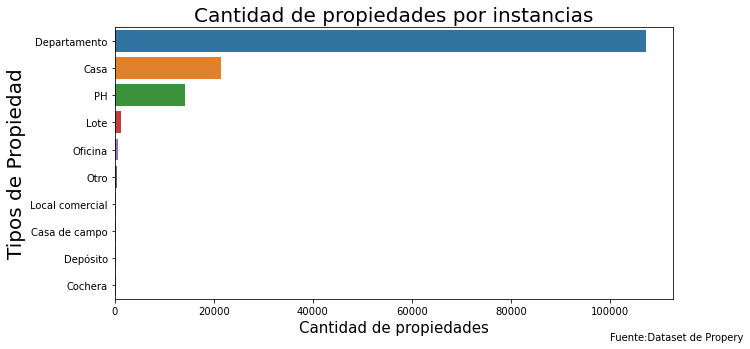

In [70]:
plt.figure(figsize=(10,5))
plt.title('Cantidad de propiedades por instancias',fontsize=20) 
sns.countplot(data=data, y='property_type', order=data['property_type'].value_counts().index)
plt.xlabel('Cantidad de propiedades',fontsize=15)
plt.ylabel('Tipos de Propiedad',fontsize=20)
plt.text((100000+1),11,'Fuente:Dataset de Propery',fontsize=10)
plt.show()


En el grafico se observa que PH, Casa y Departamento son lo tipos de propiedad con mayor cantidad de unidades, siendo los departamentos la que mayor cantidad de propiedades totales tiene. 

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

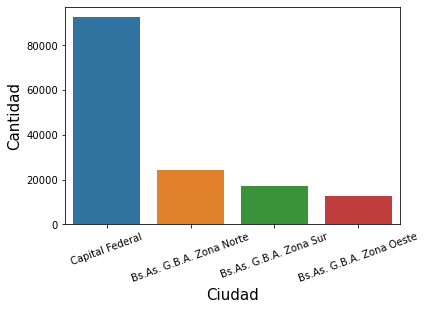

In [71]:
ubicacion=data['l2'].value_counts().index 

sns.countplot(data=data, x='l2',order=ubicacion) 
plt.xticks(rotation=20) 
plt.xlabel('Ciudad', fontsize=15)
plt.ylabel('Cantidad', fontsize= 15) 
plt.show()




En en el siguiente grafico se observa que la mayor cantidad de propiedades se encuentra en la Ciudad de Buenos Aires

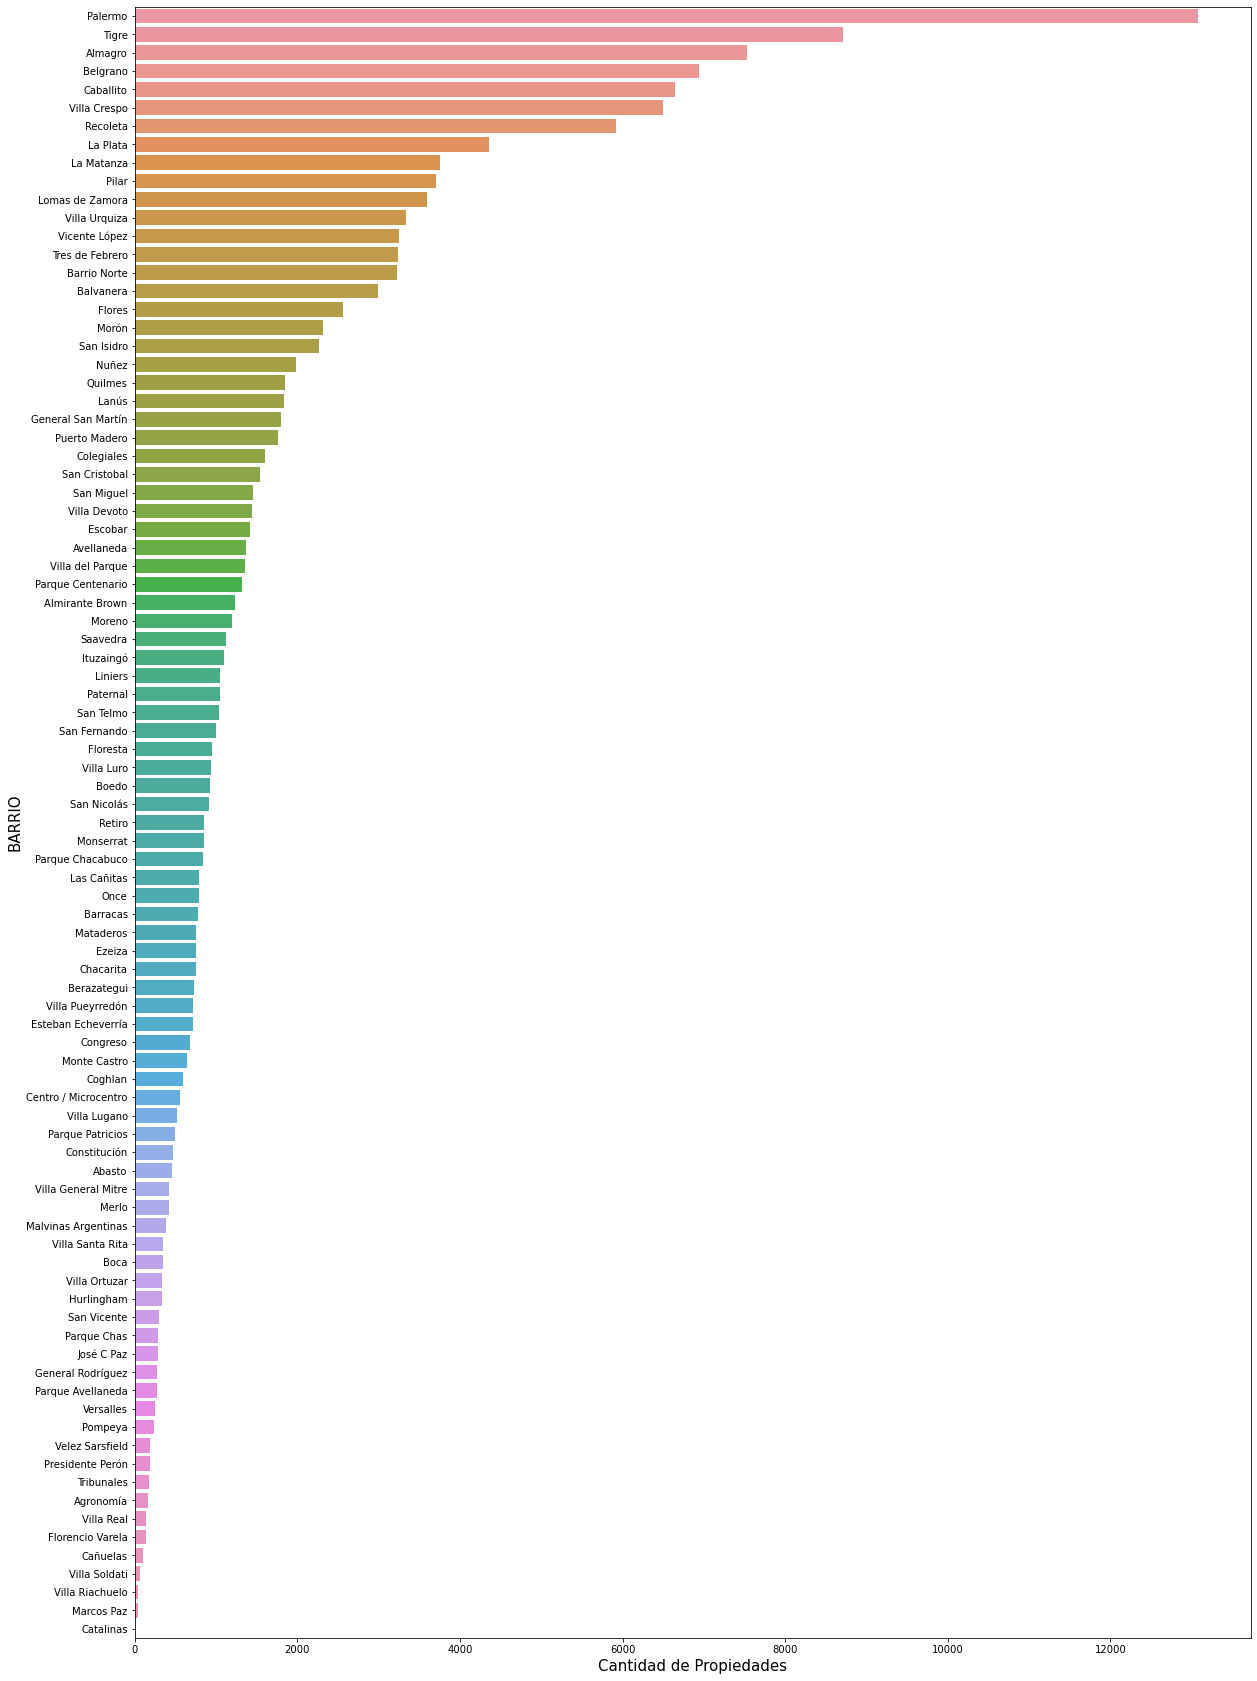

In [15]:
ubicacion_2=data['l3'].value_counts().index
plt.subplots(figsize=(20,30))
sns.countplot(data=data, y='l3', order=ubicacion_2) 
plt.ylabel('BARRIO', fontsize= 15)
plt.xlabel('Cantidad de Propiedades', fontsize= 15) 
plt.show()

En el grafico presentado se observa que dentro de CABA la mayor cantidad de propiedades se encuentran en el Barrio de Palermo

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [16]:
df=data[data.property_type.isin(['Departamento','Casa','PH']) & data.l2.isin(['Capital Federal'])] 
df.shape




(91485, 19)

In [17]:
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [18]:
df_2=df[['rooms', 'bedrooms','bathrooms','surface_total','surface_covered', 'price','property_type']] 
df_2.head() 

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH


In [19]:
df_2.shape

(91485, 7)

Una vez realizado el recorte del dataset nos quedan 91485 filas y 7 columnas 

**Se realiza una descripcion de los estadisticos del dataset** 


Donde se observa por ejemplo que el precio promedio de las propiedades seleccionadas es de US$91485

In [20]:
round(df_2.describe())

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.0,91485.0,89314.0,82568.0,82250.0,91485.0
mean,3.0,2.0,2.0,113.0,95.0,259500.0
std,1.0,1.0,1.0,981.0,779.0,322265.0
min,1.0,0.0,1.0,10.0,1.0,6000.0
25%,2.0,1.0,1.0,49.0,44.0,120000.0
50%,3.0,2.0,1.0,71.0,63.0,175000.0
75%,4.0,3.0,2.0,111.0,96.0,279000.0
max,26.0,15.0,14.0,126062.0,126062.0,32434232.0


**Observacion de Outliers para superficie total** 

Se realizan dos graficos Box-plot por cada caracteristica, para observar los outliers

<AxesSubplot:xlabel='property_type', ylabel='surface_total'>

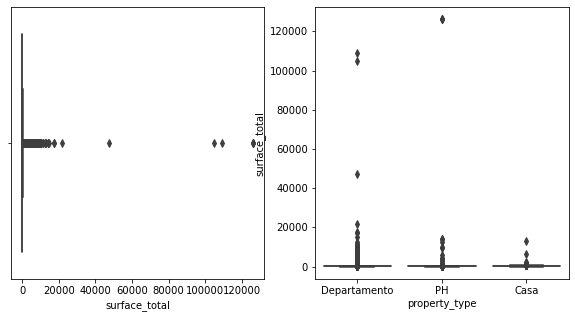

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x='surface_total', data=df_2) 
plt.subplot(1,2,2) 
sns.boxplot(x='property_type',y='surface_total', data=df_2)


- Se observaron los outliers de superficie total, donde el outlier es mayor en la propiedad de tipo PH.

**Observacion de outlier para Precios**

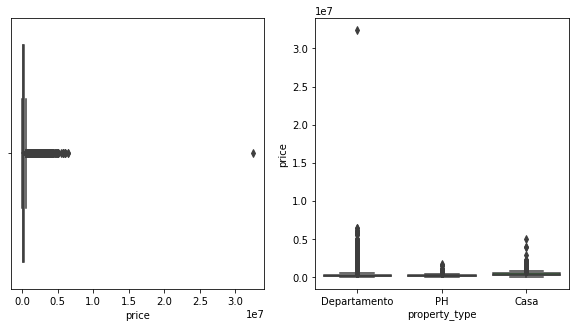

In [74]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x='price', data=df_2)
plt.subplot(1,2,2)
sns.boxplot(x='property_type',y='price',data=df_2)
plt.show()

- Se observo que la propiedad que tiene el outlier mayor es la propiedad de tipo departamento 

# Eliminacion de Valores atipicos # 

Relizamos la eliminacion de los outliers mediante el formula del rango intercuartílico 

In [23]:
Q1=df_2.quantile(0.25)
Q3=df_2.quantile(0.75)
IQR=Q3-Q1
df_3= df_2[~((df_2 < (Q1 - 1.5 * IQR)) |(df_2 > (Q3 + 1.5 * IQR))).any(axis=1)]
df_3.shape

(79937, 7)

La eliminacion de valores atipicos, nos deja una dataset de 80058 filas y 7 columnas

- Eliminamos los datos que se pueden haber generado por errores de tipeo como, que la superficie cubierta es mayor a la total

In [24]:
df_4=df_3[(df_3.surface_covered<=df_3.surface_total)]
df_4.shape



(70622, 7)

**Graficamos los graficos de tipo boxplot con la eliminacion de outliers**

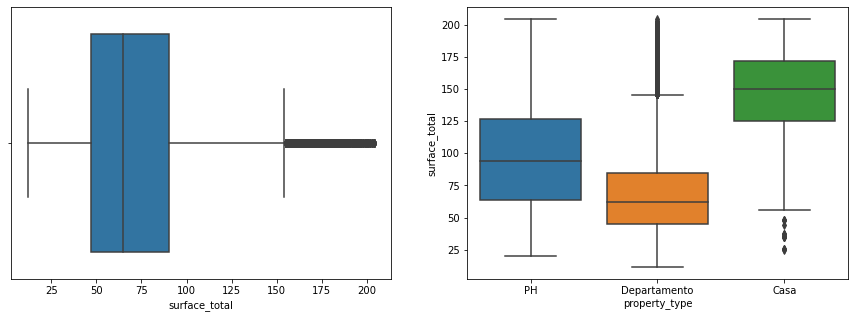

In [72]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x='surface_total', data=df_4) 
plt.subplot(1,2,2) 
sns.boxplot(x='property_type',y='surface_total', data=df_4)
plt.show()

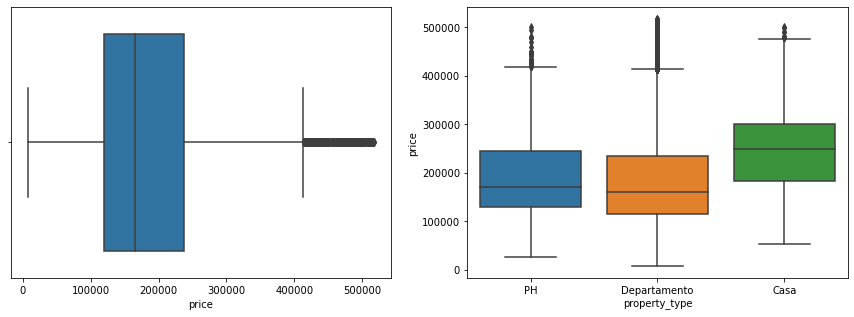

In [73]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x='price', data=df_4)
plt.subplot(1,2,2)
sns.boxplot(x='property_type',y='price',data=df_4)
plt.show()


**Se realiza un grafico de tipo Pairplot para analizar la relacion entre las diferentes variables**

In [ ]:
sns.pairplot(df_4,hue='property_type')
plt.show()

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

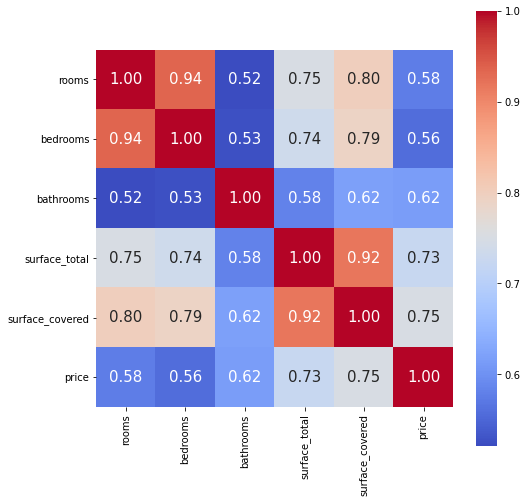

In [28]:
corr = df_4.drop(columns = 'property_type').corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_4.drop(columns = 'property_type').columns, 
           yticklabels= df_4.drop(columns = 'property_type').columns,
           cmap= 'coolwarm')

plt.show()

- Se observa que Precio y Superficie cubierta son las caracteristica con mayor correlación, sueguida por superficie total 

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

# Modelo de Machine learning

**En este proceso vuelvo a cargar los datos del dataset** 

In [29]:
ml=pd.read_csv('DS_proyecto_01_Datos_Properati.csv')

In [30]:
ml.shape

(146660, 19)

Se informa cuatas filas y columnas tiene el mismo

**Se realiza una limpieza del dataset por:**
   
   
   Tipos de propiedad: Departamento, Casa y PH 
  
   Ubicacion:Capital Federal 
   
   Superfice mayor a 15 m2 pero menor a 1000ms 
  
   Precio de propiedad menor a 4 millones de dolares 
   
   Finalmente se separa el dataframe en las columnas "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered" y "price"# 
   
   

In [31]:
ml_2=ml[ml.property_type.isin(['Departamento','Casa','PH']) & ml.l2.isin(['Capital Federal'])] 
ml_3=ml_2[(ml_2.surface_total>=15)& (ml_2.surface_total<=1000) & (ml_2.price <= 4000000)] 
ml_4=ml_3[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]  
ml_4.shape

(82373, 6)

Queda un dataframe de 82373 filas con 6 columnas 

**Se eliminan los datos faltantes (valores NaN)** 

In [32]:
df_1=ml_4.dropna() 
df_1.shape


(81019, 6)

Elegimos las varibles que mejor pueden llegar a predecir el precio de la propiedades 

In [33]:
df_1.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


In [34]:
X=df_1.drop('price',axis=1)
y=df_1.price

In [35]:
print(X.shape, y.shape)

(81019, 5) (81019,)


### Separamos los datos en test y train ###

In [36]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30, random_state=42) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# Se decidío tomar la mayor cantidad de datos para el entrenamiento dejando el 30% para el testeo 

(56713, 5)
(24306, 5)
(56713,)
(24306,)


# Modelo Benchmark # 

- Se eligio el modelo de benchmark, que será un modelo de Regresion Lineal 

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 

In [38]:
# Modelo Benchmark 
linear_model= LinearRegression() 
linear_model.fit(X_train, y_train) 


LinearRegression()

- Evaluacion del modelo de regresion linearl con el valor de r 

In [39]:
r2=linear_model.score(X,y)
print('valor de r:',  r2)

valor de r: 0.5516961159355511


In [40]:
print(linear_model.coef_,linear_model.intercept_)

[ 1.16192981e+04 -6.29435576e+04  1.32759235e+05  2.05427168e+03
  1.07004571e+02] -56646.24807940825


Se selecciono para evaluar los modelos con **RMSE** ya que se considero que es la metrica que mas se ajusta al tipo de problema a evaluar, ya que se utiliza con frecuencia en problemas de pronosticos de demanda y pronosticos de precios, haciendo que la diferencias de la  falla del modelo no sea tan castigado, no obstatante siempre termina **no** siendo perfecto el análisis.  
Con respecto el RMSE que es la raiz del modelo MSE ( que lo logro con el parametro 'Squared'done se cola 'False' para que arroje el valor de RMSE), al ser la raiz dara un valor mas chico que el modelo MSE, por lo que nosotros buscamos que el valor del RMSE sea el mas chico posible, ya que indicaria menor error.


In [41]:
from sklearn.metrics import mean_squared_error # Importamos la metrica de error para modelos de regresion


In [42]:
y_train_pred=linear_model.predict(X_train)
y_test_pred=linear_model.predict(X_test) 

In [43]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_test_pred)

0.5514864358797206

In [44]:
print('Error en datos de train:',mean_squared_error(y_train, y_train_pred, squared=False))
print('Error en datos de test:',mean_squared_error(y_test,y_test_pred, squared=False)) 
# utilzo el parametro squared=False, ya que el mismo arroja la raiz del cuadratico medio (RMSE)

Error en datos de train: 199173.83253528475
Error en datos de test: 202449.36540361567


- Se realizo un grafico de dispercion donde muestra la dispesion entre los datos testeados y los datos testeados predichos
- Tambien se elaboro un Histograma que muestra la distribucion entre los datos entrenados y los los datos testeados

Error del train: 199174.0
Error del test: 202449.0


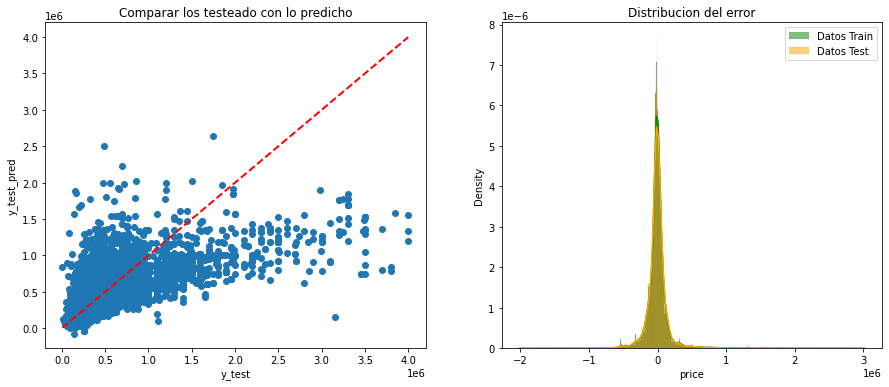

In [94]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(y_test,y_test_pred)

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(),y_test.max()], 
         'r--',linewidth=2)


plt.title('Comparar los testeado con lo predicho')
plt.xlabel('y_test')
plt.ylabel('y_test_pred') 


plt.subplot(1,2,2)
sns.histplot(y_train-y_train_pred, kde=True,label='Datos Train',stat='density',color='green')
sns.histplot(y_test-y_test_pred, kde=True,label='Datos Test',stat='density',color='orange')
plt.title('Distribucion del error')
plt.legend()

MSE=mean_squared_error(y_train,y_train_pred,squared=False)
MSE_test=mean_squared_error(y_test, y_test_pred, squared=False)
print('Error del train:',MSE.round())
print('Error del test:',MSE_test.round())

plt.show()

Decidí realizar un grafico de dispersion con la documentacion Seaborn donde nos mostraba la dispersion de los:
       
     -Datos entrenados 
      
     -Datos testeados 
       
     -Datos predichos del Train 
       
     -Datos predichos del Test 
Realizé este grafico ya que el mismo muestra una mejor distribucion que el histograma y la misma distribucion de dispersion realizada en el punto anterior

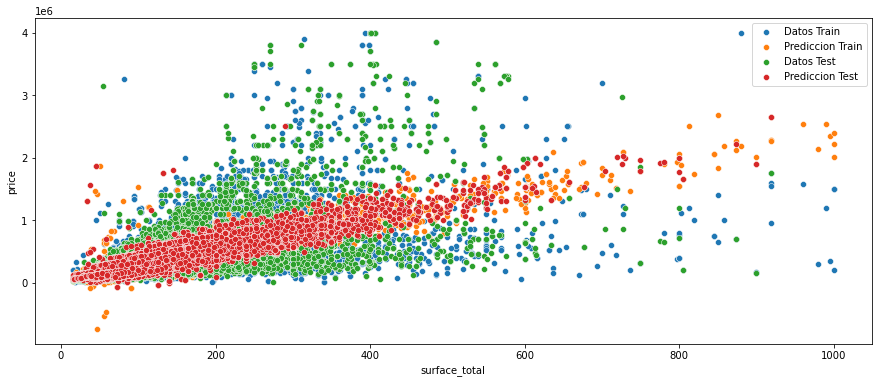

In [81]:
plt.figure(figsize = (15,6)) 
sns.scatterplot(x=X_train.iloc[:,3],y=y_train, label = 'Datos Train')
sns.scatterplot(x=X_train.iloc[:,3], y=y_train_pred, label = 'Prediccion Train') 

sns.scatterplot(x=X_test.iloc[:,3],y=y_test, label = 'Datos Test') 
sns.scatterplot(x=X_test.iloc[:,3],y=y_test_pred, label = 'Prediccion Test') 

plt.legend() 
plt.show()

# Modelo de Regresión KNN # 

In [47]:
n_neighbors=10
knn_regressor=KNeighborsRegressor(n_neighbors=n_neighbors, weights='uniform')
# Para el modelo Vecinos mas cercado se defionio coma la cantidad de vecionos de 4, para luego optimizar el modelo y elegir la cantidad de vecionos que minimize el error

**Entrenamos el modelo**

In [48]:
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

- Predecimos sobre el conjunto train y el conjunto test

In [49]:
y_train_pred_knn=knn_regressor.predict(X_train)
y_test_pred_knn=knn_regressor.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error # importo la metrica de evaluación que calcula el error cuadratico medio

- Calculamos el error del modelo

In [51]:
print('Error en datos de train:',mean_squared_error(y_train, y_train_pred_knn, squared=False))
print('Error en datos de test:',mean_squared_error(y_test,y_test_pred_knn, squared=False)) 
# utilzo el parametro squared=False, ya que el mismo arroja la raiz del cuadratico medio (RMSE)

Error en datos de train: 142074.1381975396
Error en datos de test: 161749.10186897055


- Se realizo un grafico de dispercion donde muestra la dispesion entre los datos testeados y los datos testeados predichos 
- Tambien se elaboro un Histograma que muestra la distribucion entre los datos entrenados y los los datos testeados 

Error del train: 114297.0
Error del test: 153695.0


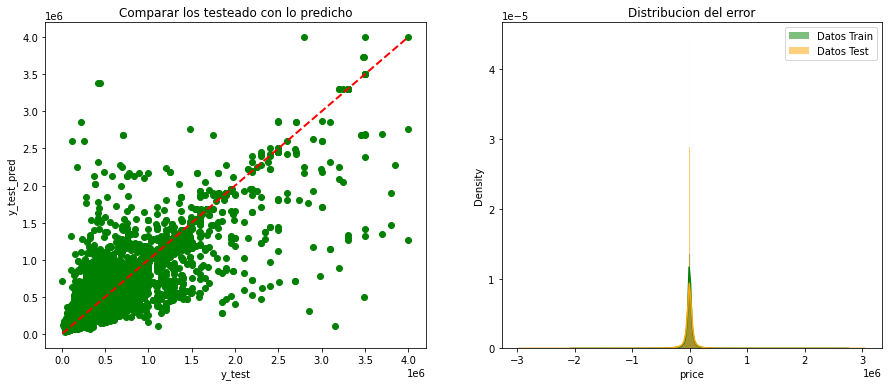

In [90]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(y_test,y_test_pred_knn,color='green')

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(),y_test.max()], 
         'r--',linewidth=2)


plt.title('Comparar los testeado con lo predicho')
plt.xlabel('y_test')
plt.ylabel('y_test_pred') 


plt.subplot(1,2,2)
sns.histplot(y_train-y_train_pred_knn, kde=True,label='Datos Train',stat='density',color='green')
sns.histplot(y_test-y_test_pred_knn, kde=True,label='Datos Test',stat='density',color='orange')
plt.title('Distribucion del error')
plt.legend()

MSE=mean_squared_error(y_train,y_train_pred_knn,squared=False)
MSE_test=mean_squared_error(y_test, y_test_pred_knn, squared=False)
print('Error del train:',MSE.round())
print('Error del test:',MSE_test.round())

plt.show()

Decidí realizar un grafico de dispersion con la documentacion Seaborn donde nos mostraba la dispersion de los:
       
     -Datos entrenados 
      
     -Datos testeados 
       
     -Datos predichos del Train 
       
     -Datos predichos del Test 
Realizé este grafico ya que el mismo muestra una mejor distribucion que el histograma y la misma distribucion de dispersion realizada en el punto anterior

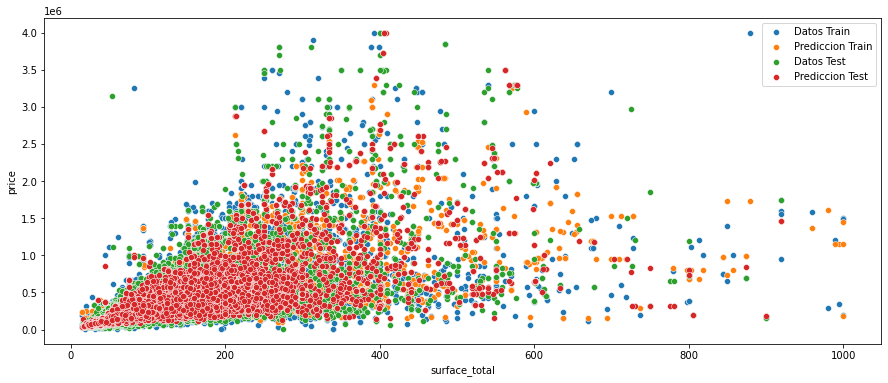

In [80]:
plt.figure(figsize = (15,6)) 
sns.scatterplot(x=X_train.iloc[:,3],y=y_train, label = 'Datos Train')
sns.scatterplot(x=X_train.iloc[:,3],y=y_train_pred_knn, label = 'Prediccion Train') 

sns.scatterplot(x=X_test.iloc[:,3],y=y_test, label = 'Datos Test') 
sns.scatterplot(x=X_test.iloc[:,3],y=y_test_pred_knn, label = 'Prediccion Test') 

plt.legend() 
plt.show()

# Optimización de Hiperparametros #

Se realizó la optimizacion de hiperparametros para el modelod de vecinos mas cercanos donde nos dará el resultado del numero de vecinos donde el error (RMSE) seria el minimo.

In [54]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_error_train = []
lista_error_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    knn_regressor.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = knn_regressor.predict(X_train)
    train_error_cuadratico_medio=mean_squared_error(y_train, y_train_pred, squared=False)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = knn_regressor.predict(X_test)
    test_error_cuadratico_medio=mean_squared_error(y_test, y_test_pred, squared= False)
    
    # Agregar la información a las listas
    lista_error_train.append(train_error_cuadratico_medio)
    lista_error_test.append(test_error_cuadratico_medio)

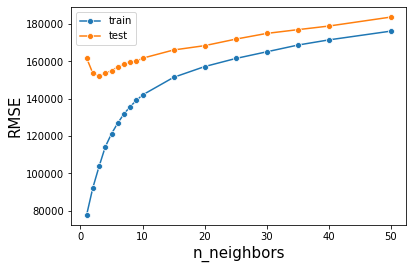

In [93]:
sns.lineplot(x=k_vecinos,y=lista_error_train, label='train', marker='o')
sns.lineplot(x=k_vecinos,y=lista_error_test, label='test', marker='o') 
plt.xlabel('n_neighbors', fontsize= 15) ## decia max_depth y para knn es n° vecinos
plt.ylabel('RMSE', fontsize=15)
plt.show()

Como resultado nos dio que si aumentamos el numero de vecinos, el error (RMSE) aumentaria. Para que los valores cercano a 0, se observa que el modelo si bien tiene un error menor, los valores entre train y test estan muy separados provocando un overfitting. Pero para el rango entre valores menores a 10 y mayores a 0, el modelo esta estable. Para que el modelo a partir de valores mayores a 10 el modelo comienze a tener underfitting entre las dos variables. Por ello tomaria valores de vecinos mayores a 0 pero menores a 10

<span style="color:red"> El valor optimo en funcion de la grafica seria 3 </span>

# Regresión Arbol de Decision #

In [56]:
tree_regressor=DecisionTreeRegressor(max_depth=5, random_state= 42)

- Entrenamos el modelo

In [57]:
tree_regressor.fit(X_train,y_train) 

DecisionTreeRegressor(max_depth=5, random_state=42)

- Predecimos sobre el conjunto train y el conjunto test

In [58]:
y_train_pred_tree=tree_regressor.predict(X_train)
y_test_pred_tree=tree_regressor.predict(X_test)

- Calculamos el error del modelo

In [59]:
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred_tree,squared=False))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred_tree, squared= False))

Error en datos de train: 169200.1754118897
Error en datos de test: 174352.7367379676


- Se realizo un grafico de dispercion donde muestra la dispesion entre los datos testeados y los datos testeados predichos
- Tambien se elaboro un Histograma que muestra la distribucion entre los datos entrenados y los los datos testeados

Error del train: 120798.0
Error del test: 152951.0


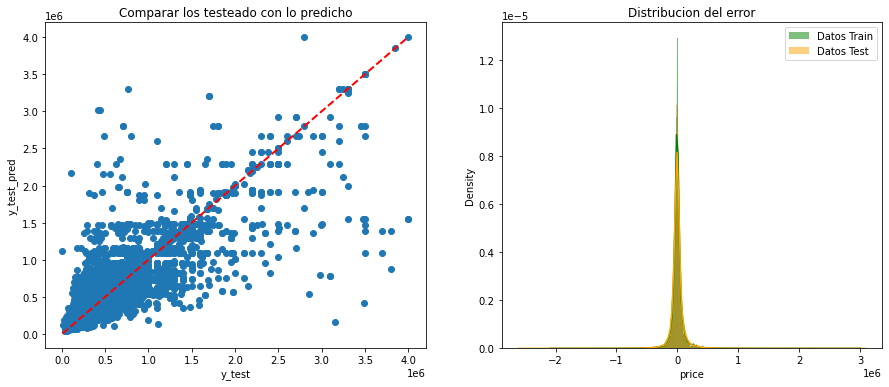

In [92]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(y_test,y_test_pred_tree)

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(),y_test.max()], 
         'r--',linewidth=2)


plt.title('Comparar los testeado con lo predicho')
plt.xlabel('y_test')
plt.ylabel('y_test_pred') 


plt.subplot(1,2,2)
sns.histplot(y_train-y_train_pred_tree, kde=True,label='Datos Train',stat='density',color='green')
sns.histplot(y_test-y_test_pred_tree, kde=True,label='Datos Test',stat='density',color='orange')
plt.title('Distribucion del error')
plt.legend()

MSE=mean_squared_error(y_train,y_train_pred_tree,squared=False)
MSE_test=mean_squared_error(y_test, y_test_pred_tree, squared=False)
print('Error del train:',MSE.round())
print('Error del test:',MSE_test.round())

plt.show()

Decidí realizar un grafico de dispersion con la documentacion Seaborn donde nos mostraba la dispersion de los:
       
     -Datos entrenados 
      
     -Datos testeados 
       
     -Datos predichos del Train 
       
     -Datos predichos del Test 
Realizé este grafico ya que el mismo muestra una mejor distribucion que el histograma y la misma distribucion de dispersion realizada en el punto anterior

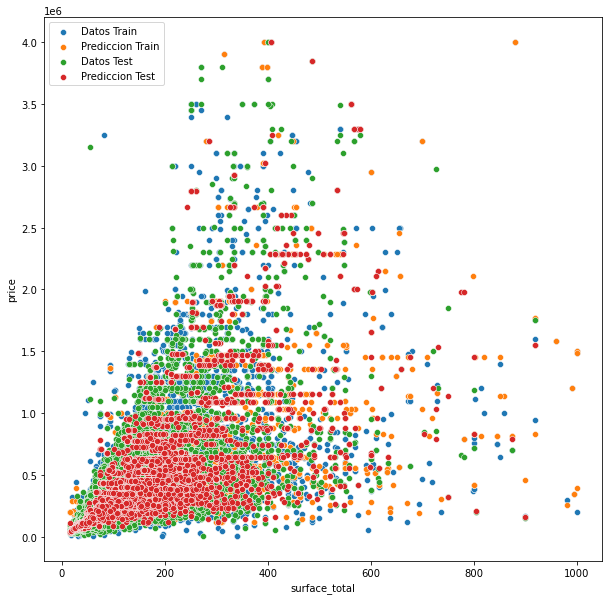

In [87]:
plt.figure(figsize = (10,10)) 
sns.scatterplot(x=X_train.iloc[:,3],y=y_train, label = 'Datos Train')
sns.scatterplot(x=X_train.iloc[:,3],y=y_train_pred_tree, label = 'Prediccion Train') 

sns.scatterplot(x=X_test.iloc[:,3],y=y_test, label = 'Datos Test') 
sns.scatterplot(x=X_test.iloc[:,3],y=y_test_pred_tree, label = 'Prediccion Test') 

plt.legend() 
plt.show()

Realizé este grafico ya que el mismo muestra una mejor distribucion que el histograma y la misma distribucion de dispersion realizada en el punto anterior

# Optimización de Hiperparametros #

Se realizó la optimizacion de hiperparametros para el modelo de arboles de decision donde nos dará el resultado del numero de vecinos donde el error (RMSE) seria el minimo.

In [62]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_error_tree_train = []
lista_error_tree_test = []

# Definimos la lista de valores de k que vamos a explorar
max_depths=np.arange(1,30)
# Generamos en loop sobre los distintos valores de k 
for n in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    tree_regressor = DecisionTreeRegressor(max_depth=n)
    
    # Entrenar el modelo
    tree_regressor.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = tree_regressor.predict(X_train)
    train_error_cuadratico_medio=mean_squared_error(y_train, y_train_pred, squared=False)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = tree_regressor.predict(X_test)
    test_error_cuadratico_medio=mean_squared_error(y_test, y_test_pred, squared= False)
    
    # Agregar la información a las listas
    lista_error_tree_train.append(train_error_cuadratico_medio)
    lista_error_tree_test.append(test_error_cuadratico_medio)

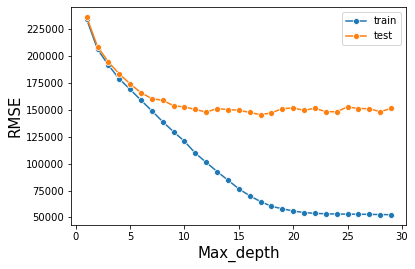

In [95]:
sns.lineplot(x=max_depths,y=lista_error_tree_train,label='train',marker='o')
sns.lineplot(x=max_depths,y=lista_error_tree_test,label='test', marker='o')
plt.xlabel('Max_depth', fontsize=15)
plt.ylabel('RMSE', fontsize=15)
plt.show()

En este analisis se observa un resultado diferente a de "vecinos mas cercanos". 
Muestra que a medida que aumenta la profundidad de lo arboles de decision, el error se va disminuyendo.  
Pero se obserca que para valores en (0,5] el modelo se encuentra underfitting. Para que valores entre [5,10) sea el numero optimo de profundidad, ya que se observa una diferencia razonable entre los dos modelos. Es optimo ya que para valores mayores el modelo se encuentra overtffiting

<span style="color:blue"> Se observa que a partir de aproximadamente 10 el error de test se estabiliza, por lo cual, siguiendo el principio de parsimonia el valor optimo de $max Depth$ seria 10 </span>



## Entrenamos los modelos despues de optimizar los hiperparametros y elejimos el mejor modelo ## 



In [64]:
# Modelo Benchmark 
linear_model= LinearRegression() 
#KNN 
n_neighbors=4
knn_regressor=KNeighborsRegressor(n_neighbors=n_neighbors, weights='uniform')
#DT
tree_regressor=DecisionTreeRegressor(max_depth=10, random_state= 42) 
#Entrenamos los modelos 
linear_model.fit(X_train, y_train) 
knn_regressor.fit(X_train, y_train)
tree_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [65]:
r2=linear_model.score(X,y)
print('valor de r:',  r2)

valor de r: 0.5516961159355511


In [66]:
y_train_pred=linear_model.predict(X_train)
y_test_pred=linear_model.predict(X_test)
#Prediccion para el modelo KNN 
y_train_pred_knn=knn_regressor.predict(X_train)
y_test_pred_knn=knn_regressor.predict(X_test)
#Predicciones para el modelo DT
y_train_pred_tree=tree_regressor.predict(X_train)
y_test_pred_tree=tree_regressor.predict(X_test)

In [67]:
print('Error en datos de train para RL:',mean_squared_error(y_train, y_train_pred, squared=False))
print('Error en datos de test para RL:',mean_squared_error(y_test,y_test_pred,squared=False))
print()
print('Error en datos de train para KNN :',mean_squared_error(y_train, y_train_pred_knn, squared=False))
print('Error en datos de test para KNN:',mean_squared_error(y_test,y_test_pred_knn, squared=False)) 
print() 
print('Error en datos de train para DT:',mean_squared_error(y_train, y_train_pred_tree,squared=False))
print('Error en datos de test DT:',mean_squared_error(y_test,y_test_pred_tree,squared=False))

Error en datos de train para RL: 199173.83253528475
Error en datos de test para RL: 202449.36540361567

Error en datos de train para KNN : 114297.26298367885
Error en datos de test para KNN: 153695.14678737795

Error en datos de train para DT: 120797.5008434747
Error en datos de test DT: 152950.67757423845


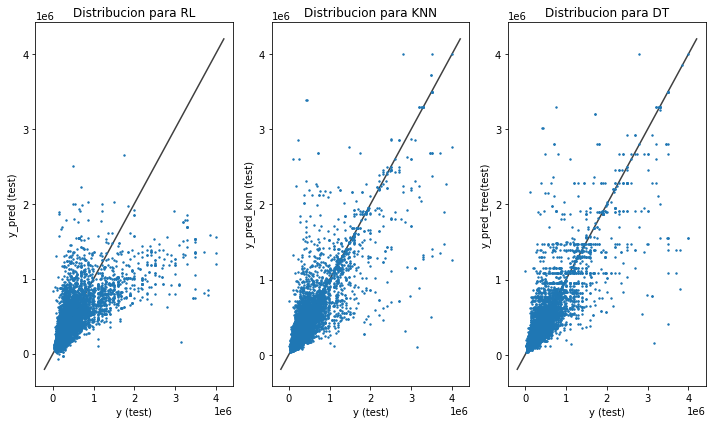

In [97]:
plt.figure(figsize=(10,6))
ax = plt.subplot(1,3,1)

plt.title('Distribucion para RL')
ax.scatter(y_test ,y_test_pred, s =2)

    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

ax = plt.subplot(1,3,2)
plt.title('Distribucion para KNN')
ax.scatter(y_test ,y_test_pred_knn, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred_knn (test)')



ax = plt.subplot(1,3,3)
plt.title('Distribucion para DT')
ax.scatter(y_test ,y_test_pred_tree, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    

    
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred_tree(test)')
    
plt.tight_layout()
plt.show()

### <span style="color:blue"> **Comparación entre modelos**:
    
A continuacion se muestra una tabla comparativa de todos los modelos utilizados. De la misma se desprende que:

    - El mejor módelo en terminos del error (menor RMSE) es el modelo de DT. 
    - Además, en los gráficos se observa que dicho modelo presenta la mejor relación 1:1, entre las observaciones y predicciones (r^2= 0.551696)
    - Pero ante de elegir este modelo que tiene menor RMSE, en los resultados del árbol de decisión se obervan asintotas horizontales productos de las fronteras de decisión de dicho módelo. Por lo cúal no sería un buen modelo para el problema en estudio.  

In [69]:
resumen =pd.DataFrame ({"Modelo":["Benchmark", "Árbol de decisión", "Árbol de decisión", "Vecinos más cercanos", "Vecinos más cercanos"], 
           "Hiper-parámetros":["profundidad máxima = 8", "profundidad máxima = 5", "profundidad máxima = 10", "número de vecinos = 10", "número de vecinos = 3"], 
           "Variables X": [2, 7, 4, 5, 7], "RMSE (test)":["202449", "161749", "151281", "153695", "152950"]})
pd.DataFrame(resumen)           

,Modelo,Hiper-parámetros,Variables X,RMSE (test)
0,Benchmark,profundidad máxima = 8,2,202449
1,Árbol de decisión,profundidad máxima = 5,7,161749
2,Árbol de decisión,profundidad máxima = 10,4,151281
3,Vecinos más cercanos,número de vecinos = 10,5,153695
4,Vecinos más cercanos,número de vecinos = 3,7,152950


# <span style="color:red"> **Criticas a los modelos** :
    
Considero que la información que no se esta utilizando y podría apoyar es entrenar el modelo con las 3 principales zonas de buenos aires, ya que en este entrenamiento solo se utilizó Capital Federal, talvez la información que podria estar demás son la descripición de la vivienda y podría decirse que la superficie total y construida juegan un papel muy simetrico y similar en correlación con el precio.

Las variables que más determinaron en la predicción del precio, fue la superficie construida así como tambien elementos inesperados como los sanitarios, ya que tuvieron una fuerte correlación en cada tipo de propiedades.

# CONCLUSIONES FINALES:

Si bien el mejor modelo encontrado en el marco de este proyecto fue el K-NN, debido a que el error sigue siendo alto en relación al rango dinámico de la variable. Por lo cual, esperamos que al utilizar modelos más avanzados el error disminuye e incluir otras variables (e.g property type) obtengamos mejores resultados (menor error, y menos varianza en las predicciones especialmente para valores altos de precios (> 500,000 USD).
    
    